# Import The Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import The Dataset

In [2]:
Data = pd.read_csv("/mnt/f/Data Science/Datasets/Group Project/Womens Clothing E-Commerce Reviews.csv")
Data

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


# Data Preparation


## Pre-Processing

#### Handle Categorical Data

In [3]:
Data.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [4]:
Data1 = Data.iloc[:, [2, 5, 7, 6]]
Data1

,Age,Rating,Positive Feedback Count,Recommended IND
0,33,4,0,1
1,34,5,4,1
2,60,3,0,0
3,50,5,0,1
4,47,5,6,1
...,...,...,...,...
23481,34,5,0,1
23482,48,3,0,1
23483,31,3,1,0
23484,28,3,2,1


#### Handle Missing Values

In [5]:
Data1.isnull().sum()

Age                        0
Rating                     0
Positive Feedback Count    0
Recommended IND            0
dtype: int64

#### Handle Outliers Data

<AxesSubplot:>

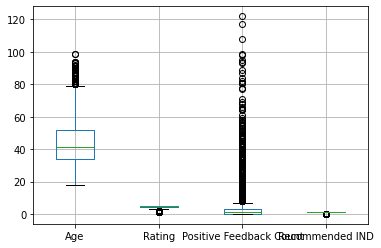

In [6]:
Data1.boxplot()

In [7]:
# Age

Q1 = Data1.iloc[:, 0].quantile(0.25)
Q3 = Data1.iloc[:, 0].quantile(0.75) 

LB = Q1 - 1.5 * (Q3 - Q1)
UB = Q3 + 1.5 * (Q3 - Q1)

print(LB, UB)

7.0 79.0


In [8]:
Data1[Data1["Age"] > 79.0].shape

(109, 4)

In [9]:
Data2 = Data1[Data1["Age"] <= 79.0].reset_index().drop("index", axis = 1)
Data2

,Age,Rating,Positive Feedback Count,Recommended IND
0,33,4,0,1
1,34,5,4,1
2,60,3,0,0
3,50,5,0,1
4,47,5,6,1
...,...,...,...,...
23372,34,5,0,1
23373,48,3,0,1
23374,31,3,1,0
23375,28,3,2,1


In [10]:
# Rating

Q1 = Data2.iloc[:, 1].quantile(0.25)
Q3 = Data2.iloc[:, 1].quantile(0.75) 

LB = Q1 - 1.5 * (Q3 - Q1)
UB = Q3 + 1.5 * (Q3 - Q1)

print(LB, UB)

2.5 6.5


In [11]:
Data2[Data2["Rating"] < 2.5].shape

(2397, 4)

In [12]:
Data3 = Data2[Data2["Rating"] >= 2.5].reset_index().drop("index", axis = 1)
Data3

,Age,Rating,Positive Feedback Count,Recommended IND
0,33,4,0,1
1,34,5,4,1
2,60,3,0,0
3,50,5,0,1
4,47,5,6,1
...,...,...,...,...
20975,34,5,0,1
20976,48,3,0,1
20977,31,3,1,0
20978,28,3,2,1


In [13]:
# Positive Feedback Count

Q1 = Data3.iloc[:, 2].quantile(0.25)
Q3 = Data3.iloc[:, 2].quantile(0.75) 

LB = Q1 - 1.5 * (Q3 - Q1)
UB = Q3 + 1.5 * (Q3 - Q1)

print(LB, UB)

-3.0 5.0


In [17]:
Data3[Data3["Positive Feedback Count"] > 5.0].shape

(2588, 4)

In [18]:
Data4 = Data3[Data3["Positive Feedback Count"] <= 5.0].reset_index().drop("index", axis = 1)
Data4

,Age,Rating,Positive Feedback Count,Recommended IND
0,33,4,0,1
1,34,5,4,1
2,60,3,0,0
3,50,5,0,1
4,39,5,1,1
...,...,...,...,...
18387,35,5,0,1
18388,34,5,0,1
18389,48,3,0,1
18390,31,3,1,0


#### Handle Duplicate Data


In [20]:
Data4.duplicated().sum()

17127

## Feature Scaling

In [24]:
# MIn-MAx Method

Data4_binary = Data4.iloc[:, -1]
X_Data4 = Data4.iloc[:, [0, 1, 2]].values

from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

X_mm_Data4 = minmax_scaler.fit_transform(X_Data4)

X_mm_Data4_df = pd.DataFrame(X_mm_Data4, columns = Data4.iloc[:, [0, 1, 2]].columns)

Data5 = pd.concat([X_mm_Data4_df, Data4_binary], axis = 1)
Data5


,Age,Rating,Positive Feedback Count,Recommended IND
0,0.245902,0.5,0.0,1
1,0.262295,1.0,0.8,1
2,0.688525,0.0,0.0,0
3,0.524590,1.0,0.0,1
4,0.344262,1.0,0.2,1
...,...,...,...,...
18387,0.278689,1.0,0.0,1
18388,0.262295,1.0,0.0,1
18389,0.491803,0.0,0.0,1
18390,0.213115,0.0,0.2,0


## Feature Selection

<AxesSubplot:>

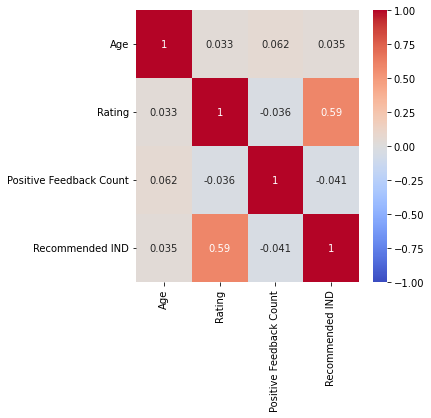

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (5,5))
sns.heatmap(Data5.corr(), vmin = -1, vmax = 1, annot = True, cmap = "coolwarm")

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X1 = Data5.iloc[:, :-1] 
Y1 = Data5.iloc[:, -1]

bestfeatures = SelectKBest(score_func = chi2, k = 3)
fit = bestfeatures.fit(X1, Y1)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X1.columns)

featurescores =pd.concat([dfcolumns, dfscores], axis = 1)
featurescores.columns = ["Feature name", "Feature score"]

featurescores.nlargest(3, "Feature score")

,Feature name,Feature score
1,Rating,1086.457638
2,Positive Feedback Count,11.707440
0,Age,2.200341


In [27]:
Data6 = Data5.iloc[:, [1, 3]]
Data6

,Rating,Recommended IND
0,0.5,1
1,1.0,1
2,0.0,0
3,1.0,1
4,1.0,1
...,...,...
18387,1.0,1
18388,1.0,1
18389,0.0,1
18390,0.0,0


## Handle Imbalanced Data

In [28]:
Data6.iloc[:, -1].value_counts()

1    16832
0     1560
Name: Recommended IND, dtype: int64

In [30]:
# SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE()

x = Data6.iloc[:, [0]]
y = Data6.iloc[:, [1]]

x_smote, y_smote = smote.fit_resample(x, y)

# Result:

print(y.shape)
print(y_smote.shape)

(18392, 1)
(33664, 1)


In [31]:
x_smote_df = pd.DataFrame(x_smote, columns = x.columns)
y_smote_df = pd.DataFrame(y_smote)

Data7 = pd.concat([x_smote_df, y_smote_df], axis = 1)
Data7

,Rating,Recommended IND
0,0.5,1
1,1.0,1
2,0.0,0
3,1.0,1
4,1.0,1
...,...,...
33659,0.0,0
33660,0.0,0
33661,0.5,0
33662,0.0,0


# Splitting The Dataset Into The Training set and The Test set

In [32]:
X = Data7.iloc[:, [0]]      # فيچرهاي اصلي
Y = Data7.iloc[:, [1]]        # فيچر هدف

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# Trainnig the KNN Model on the Training set

In [38]:
from sklearn.neighbors import KNeighborsClassifier
Classifier = KNeighborsClassifier(n_neighbors = 5, metric = "manhattan")
Classifier.fit(X_train, Y_train)

/home/soheil/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='manhattan')

# Predict the Test set results

In [40]:
y_pred = Classifier.predict(X_test)

# Validation

### Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, y_pred)

array([[4627,  514],
       [ 316, 4643]])

### Accuracy Score

In [42]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, y_pred)

0.9178217821782179

### Precision and Recall

In [43]:
# Precision

from sklearn.metrics import precision_score

precision_score(Y_test, y_pred)

0.9003296490207485

In [44]:
# RecaLL

from sklearn.metrics import recall_score

recall_score(Y_test, y_pred)

0.936277475297439

### F1-Score

In [45]:
from sklearn.metrics import f1_score

f1_score (Y_test, y_pred)

0.9179517595887702

### K-Fold Validation

In [47]:
from sklearn.model_selection import cross_val_score

estimator = cross_val_score(estimator = Classifier, X = X_train, y = Y_train, cv = 20)
estimator.mean()

# it works with Train Data
# estimator ---> Model 
# cv ---> cross-validation generator or an iterable


/home/soheil/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/soheil/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/soheil/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/soheil/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

0.9158067180180607